In [3]:
#네이버 뉴스검색
#주제 : “피서지” 관련 기사를 통한 이슈 분석\n"
#데이터 : 2000/8/3 기사  2015/8/3 기사 
#피서지와 관련된 주요연관 단어들이 시대 흐를수록 범죄관련 단어들이 많을것이다
#예상결과 : 위험단어도출 (성폭력,경찰서,안전)

In [1]:
import requests

In [2]:
import lxml.html

In [3]:
import csv

In [4]:
#http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&query=%C7%C7%BC%AD&sm=all.basic&pd=4&startDate=2000-08-03&endDate=20000803&page=1

In [5]:
base_url ='http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&query=%C7%C7%BC%AD&sm=all.basic&pd=4&startDate=2000-08-03&endDate=20000803&page={}'
#tit_url = './/a[@class = "tit"]'
#text_url = './/div[@id ="articleBodyContents"]'

with open('news_2000.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)

    for page in range(1,15):
        res =requests.get (base_url.format(page))
        root_list = lxml.html.fromstring(res.text)
#        print (page)

        for node in root_list.xpath('.//a[@class = "go_naver"]'):
            try:
                res = requests.get (node.attrib['href'])
                sub_list = lxml.html.fromstring(res.text)
#                print (node.text_content(), node.attrib['href'])
                sub_text =sub_list.xpath( './/div[@id ="articleBodyContents"]')[0] 
                print (sub_text.text_content())
                writer.writerow([sub_text.text_content()])            
            except:
                continue



	
	
	불볕더위가 기승을 부리는 요즘,미술관마다 더위를 피해 그림을 감상하려는 시민들의 발걸음이 줄을 잇고 있다.특히 백남준 김기창 피카소등 국내외 거장들의 작품전과 러시아 회화전등 초대형전시가 열리고 있는 미술관에는 가족단위와 단체관람객들의 인파가 몰려 크게붐비고 있다.지난달 21일부터 "백남준의 세계전"이 열리고 있는 호암갤러리와 로댕갤러리에는 계속되는 무더위속에서도 백남준의 예술세계를 감상하려는 인파가 넘쳐나고 있다.이곳을 찾는 관람객수는 평일 2천여명,휴일 3천여명으로 2일 현재까지 총 2만여명을 기록하고 있다.평일에는 방학을 맞은 초.중.고등학생들과 직장인들이 주로 찾고 있으며 주말에는 자녀를 동반한 가족관람객들로 성황을 이루고 있다.가끔 지방에서 올라온 미술광들도 눈에 띄고 있다.삼성문화재단의 신유경대리는 "세계적인 예술가로 명성을 떨치고 있는 백남준씨의 독특하고 환상적인 작품세계를 감상하려는 관람열기로 전시장은 연일 붐비고 있다"며 "이러한 대형전시는 앞으로도 국내에선 보기 힘들것"이라고 말했다.지난1일부터 두 갤러리를 잇는 무료셔틀버스가 운행되고 있다.10월29일까지.칸딘스키 샤갈등 러시아회화와 이콘화,로마노프황실보석등을 전시중인 덕수궁미술관의 "러시아,천년의 삶과 예술전"에는 너무 많은 인파가 몰려 미술관측도 놀라워할 정도다.지난달 7일 개막한 이 전시에는 시간이 갈수록 관람인파가 늘어 이달들어 평일인데도 2천4백~2천8백명이 다녀가고 있다.덕수궁미술관 관계자는 "미술관개관이래 이렇게 많은 관람객이 몰려든 것은 본적이 없다"며 "러시아 26개박물관에 소장된 유물들을 한자리에 모은 흔치않은 전시여서 미술애호가들이 많이 찾는 것 같다"고 분석했다.9월30일까지.갤러리현대와 조선일보미술관에서 동시에 열리고 있는 운보 김기창화백의 회고전 역시 관람객들의 발길이 이어지긴 마찬가지.지난달 5일부터 한달째 열리고 있는 이 전시에는 평일 1천여명,주말 1천5백여명이 찾고 있다.관람객들은 청각장애를 딛고 창작열을 불태우며 한국화단의 거장으로 우뚝선 그의 불

In [6]:
news = []
with open('news_2000.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

In [7]:
from konlpy.tag import Twitter, Kkma, Komoran, Hannanum

In [8]:
tagger = Komoran()

In [9]:
tagger

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
def get_word(doc):  
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [12]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)
tdf = cv.fit_transform(news)
words = cv.get_feature_names()

In [13]:
import csv

In [14]:
f= open('removeWords.csv','r')
r = f.readlines()
removeWords = list(map(lambda s: s.strip(),r))
f.close()

In [15]:
cleanWords =[words for words in words if words not in removeWords]

In [16]:
import numpy

In [17]:
count_mat = tdf.sum(axis=0)
count_mat

matrix([[ 5,  4,  4,  4,  6,  6, 21,  4,  4,  9,  9,  4,  4, 16,  5,  5,  7,
          5,  4,  4,  6,  4,  5,  7,  4,  4,  7, 12,  5,  4,  5, 29,  6,  4,
          6,  7,  5,  4,  4,  6,  4,  4,  5,  8,  6, 16,  4,  6,  4,  7]], dtype=int64)

In [18]:
count = numpy.squeeze(numpy.asarray(count_mat))
count

array([ 5,  4,  4,  4,  6,  6, 21,  4,  4,  9,  9,  4,  4, 16,  5,  5,  7,
        5,  4,  4,  6,  4,  5,  7,  4,  4,  7, 12,  5,  4,  5, 29,  6,  4,
        6,  7,  5,  4,  4,  6,  4,  4,  5,  8,  6, 16,  4,  6,  4,  7], dtype=int64)

In [19]:
word_count = list(zip(cleanWords, count))
word_count

[('가족', 5),
 ('경우', 4),
 ('경포대', 4),
 ('고객', 4),
 ('공장', 6),
 ('공짜', 6),
 ('과학', 21),
 ('관광객', 4),
 ('관람', 4),
 ('관람객', 9),
 ('관리', 9),
 ('국제', 4),
 ('다이빙', 4),
 ('단양', 16),
 ('대전', 5),
 ('대회', 5),
 ('러시아', 7),
 ('만화', 5),
 ('무대', 4),
 ('미술', 4),
 ('미술관', 6),
 ('바다', 4),
 ('바위', 5),
 ('세계', 7),
 ('시설', 4),
 ('전시', 4),
 ('전시회', 7),
 ('지난달', 12),
 ('체험', 5),
 ('축제', 4),
 ('해변', 5),
 ('행사', 29),
 ('호주', 6),
 ('화장실', 4),
 ('환경', 6),
 ('회사', 7)]

In [20]:
import operator

In [21]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('행사', 29),
 ('과학', 21),
 ('단양', 16),
 ('지난달', 12),
 ('관람객', 9),
 ('관리', 9),
 ('러시아', 7),
 ('세계', 7),
 ('전시회', 7),
 ('회사', 7),
 ('공장', 6),
 ('공짜', 6),
 ('미술관', 6),
 ('호주', 6),
 ('환경', 6),
 ('가족', 5),
 ('대전', 5),
 ('대회', 5),
 ('만화', 5),
 ('바위', 5),
 ('체험', 5),
 ('해변', 5),
 ('경우', 4),
 ('경포대', 4),
 ('고객', 4),
 ('관광객', 4),
 ('관람', 4),
 ('국제', 4),
 ('다이빙', 4),
 ('무대', 4),
 ('미술', 4),
 ('바다', 4),
 ('시설', 4),
 ('전시', 4),
 ('축제', 4),
 ('화장실', 4)]

In [22]:
%matplotlib inline

In [23]:
from wordcloud import WordCloud

In [24]:
from matplotlib import pyplot

In [25]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

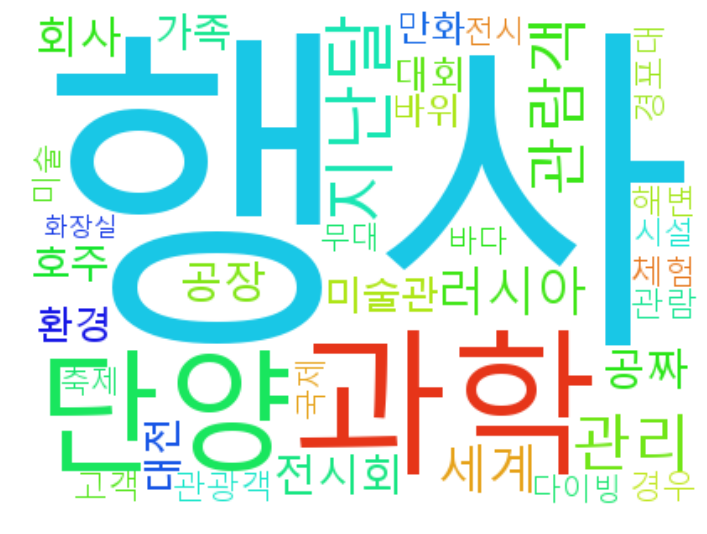

In [26]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [27]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)
word_corr

array([[ 1.        ,  0.48566186, -0.33113309, ...,  0.53702161,
        -0.15389675, -0.50581415],
       [ 0.48566186,  1.        , -0.22222222, ...,  0.99108149,
        -0.04303315, -0.08486251],
       [-0.33113309, -0.22222222,  1.        , ..., -0.20272121,
        -0.25819889,  0.76376262],
       ..., 
       [ 0.53702161,  0.99108149, -0.20272121, ...,  1.        ,
        -0.13085598, -0.15483088],
       [-0.15389675, -0.04303315, -0.25819889, ..., -0.13085598,
         1.        ,  0.19720266],
       [-0.50581415, -0.08486251,  0.76376262, ..., -0.15483088,
         0.19720266,  1.        ]])

In [28]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

In [29]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)
edges = edges[:50]
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

In [30]:
import networkx

In [31]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

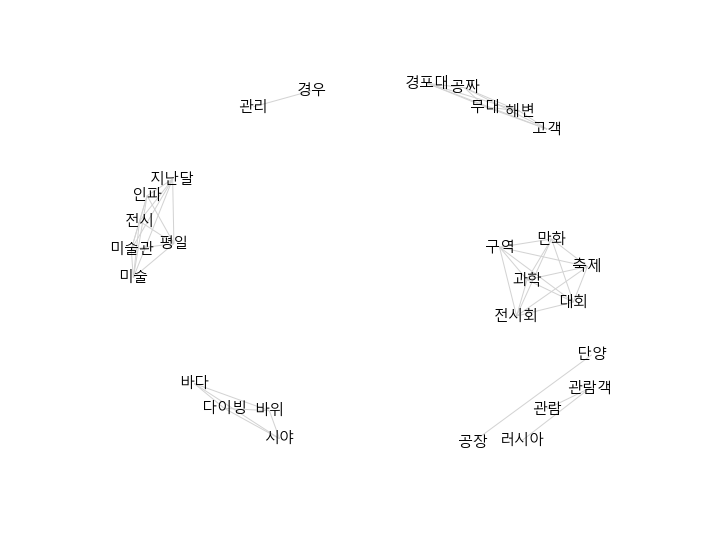

In [32]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()

In [33]:
base_url ='http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&query=%C7%C7%BC%AD&sm=all.basic&pd=4&startDate=2015-08-03&endDate=2015-08-03={}'
#tit_url = './/a[@class = "tit"]'
#text_url = './/div[@id ="articleBodyContents"]'

with open('news_2015.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)

    for page in range(1,15):
        res =requests.get (base_url.format(page))
        root_list = lxml.html.fromstring(res.text)
#        print (page)

        for node in root_list.xpath('.//a[@class = "go_naver"]'):
            try:
                res = requests.get (node.attrib['href'])
                sub_list = lxml.html.fromstring(res.text)
#                print (node.text_content(), node.attrib['href'])
                sub_text =sub_list.xpath( './/div[@id ="articleBodyContents"]')[0] 
                print (sub_text.text_content())
                writer.writerow([sub_text.text_content()])            
            except:
                continue


	
	
	

【산청=뉴시스】남병희 기자 = 경남 산청경찰서는 3일 삼장면 송정숲 강변에서 피서객들을 대상으로 4대 사회악(성폭력·가정폭력·학교폭력·불량식품) 근절을 위한 홍보 캠페인을 실시했다. 이날 캠페인은 경찰관을 비롯해 여성명예파출소장, 녹색어머니회원 등 50여명이 참석해 여름철 피서지에서 발생할 수 있는 성폭력 범죄 예방법 전단지 교부와 4대 사회악 척결을 위한 홍보활동을 펼쳤다. 산청경찰서 관계자는 "피서객이 몰리는 계곡과 유원지 일대에 성폭력 전담팀을 집중 운영하고 피서지 내 강제추행, 몰래카메라 촬영 등 성범죄 예방과 홍보에 경찰력을 집중할 예정"이라고 밝혔다.  sc0273＠newsis.com★ 세상에 이런일이 -  경찰이 내연녀 성관계 ´몰카´ 촬영하더니… ★ 오늘의 핫 포토 -  곧 벗을 그녀들 

	
	

	
	
	3일 산청군 삼장면 송정숲 강변에서 피서객을 대상으로 4대 사회악 근절을 위한 홍보에 나선 경남 산청경찰서(산청경찰서 제공) 2015.08.03/뉴스1 © News1 박철 기자(경남 산청=뉴스1) 박철 기자 = 경남 산청경찰서(경찰서장 진종근)는 3일 산청군 삼장면 송정숲 강변에서 피서객을 대상으로 4대 사회악 근절을 위한 홍보에 나섰다. 이날 행사에는 경찰관을 비롯한 여성명예파출소장, 녹색어머니회원 등 50여명이 참가, 여름철 피서지 성폭력 등 범죄 예방법 전단지 교부 등 4대 사회악 척결 홍보활동으로 피서객으로부터 큰 호응을 얻었다. 산청경찰서는 피서객이 몰리는 계곡·유원지 일대에 성폭력 전담팀을 집중 운영하고, 유관기관·협력단체와 협업해 피서지 내 강제추행·몰래카메라 촬영 등 성범죄 예방 홍보에 경찰력을 집중할 예정이다.pc9006@▶ 뉴스1 100% 무료 만화 서비스 오픈!![© 뉴스1코리아(news1.kr), 무단 전재 및 재배포 금지]
	
	

	
	
	(논산=뉴스1) 이영석 기자 = 논산시는 본격적인 여름 피서철을 맞아 피서객들의 안전 확보를 위해 5~14일 10일간 피서지 및 관광지 주변 숙박업소, 음식점 등에 대

In [34]:
news=[]
with open('news_2015.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

In [35]:
print(news)

['\r\r\n\t\r\r\n\t\r\r\n\t\r\n\r\n【산청=뉴시스】남병희 기자 = 경남 산청경찰서는 3일 삼장면 송정숲 강변에서 피서객들을 대상으로 4대 사회악(성폭력·가정폭력·학교폭력·불량식품) 근절을 위한 홍보 캠페인을 실시했다. 이날 캠페인은 경찰관을 비롯해 여성명예파출소장, 녹색어머니회원 등 50여명이 참석해 여름철 피서지에서 발생할 수 있는 성폭력 범죄 예방법 전단지 교부와 4대 사회악 척결을 위한 홍보활동을 펼쳤다. 산청경찰서 관계자는 "피서객이 몰리는 계곡과 유원지 일대에 성폭력 전담팀을 집중 운영하고 피서지 내 강제추행, 몰래카메라 촬영 등 성범죄 예방과 홍보에 경찰력을 집중할 예정"이라고 밝혔다.  sc0273＠newsis.com★ 세상에 이런일이 -  경찰이 내연녀 성관계 ´몰카´ 촬영하더니… ★ 오늘의 핫 포토 -  곧 벗을 그녀들 \r\n\r\r\n\t\r\r\n\t', '\r\r\n\t\r\r\n\t\r\r\n\t3일 산청군 삼장면 송정숲 강변에서 피서객을 대상으로 4대 사회악 근절을 위한 홍보에 나선 경남 산청경찰서(산청경찰서 제공) 2015.08.03/뉴스1 © News1 박철 기자(경남 산청=뉴스1) 박철 기자 = 경남 산청경찰서(경찰서장 진종근)는 3일 산청군 삼장면 송정숲 강변에서 피서객을 대상으로 4대 사회악 근절을 위한 홍보에 나섰다. 이날 행사에는 경찰관을 비롯한 여성명예파출소장, 녹색어머니회원 등 50여명이 참가, 여름철 피서지 성폭력 등 범죄 예방법 전단지 교부 등 4대 사회악 척결 홍보활동으로 피서객으로부터 큰 호응을 얻었다. 산청경찰서는 피서객이 몰리는 계곡·유원지 일대에 성폭력 전담팀을 집중 운영하고, 유관기관·협력단체와 협업해 피서지 내 강제추행·몰래카메라 촬영 등 성범죄 예방 홍보에 경찰력을 집중할 예정이다.pc9006@▶ 뉴스1 100% 무료 만화 서비스 오픈!![© 뉴스1코리아(news1.kr), 무단 전재 및 재배포 금지]\r\r\n\t\r\r\n\t', '\r\r\n\t\r\r\n\t\r\r\n

In [36]:
from konlpy.tag import Twitter, Kkma, Komoran, Hannanum

In [37]:
tagger = Komoran()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
def get_word(doc):  
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [40]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)
tdf = cv.fit_transform(news)
words = cv.get_feature_names()

In [41]:
import csv

In [42]:
f= open('removeWords.csv','r')
r = f.readlines()
removeWords = list(map(lambda s: s.strip(),r))
f.close()

In [43]:
cleanWords =[words for words in words if words not in removeWords]

In [44]:
import numpy

In [45]:
count_mat = tdf.sum(axis=0)
count_mat

matrix([[ 70,  42,  42,  56,  70,  42,  42,  42, 112,  98, 140,  42,  42,
         126,  70,  42,  70,  70,  84,  42,  28,  70,  42, 126,  42,  42,
         308,  42,  84,  56,  70,  70,  42,  42,  42,  42,  70,  42,  42,
          70,  98, 252,  98,  70,  84, 140,  70,  42,  98,  42]], dtype=int64)

In [46]:
count = numpy.squeeze(numpy.asarray(count_mat))
count

array([ 70,  42,  42,  56,  70,  42,  42,  42, 112,  98, 140,  42,  42,
       126,  70,  42,  70,  70,  84,  42,  28,  70,  42, 126,  42,  42,
       308,  42,  84,  56,  70,  70,  42,  42,  42,  42,  70,  42,  42,
        70,  98, 252,  98,  70,  84, 140,  70,  42,  98,  42], dtype=int64)

In [47]:
word_count = list(zip(cleanWords, count))
word_count

[('4대 사회악', 70),
 ('가량', 42),
 ('강변', 42),
 ('경남', 56),
 ('경포해수욕장', 70),
 ('관계자', 42),
 ('근절', 42),
 ('금지', 42),
 ('기자', 112),
 ('동해안', 98),
 ('미화원', 140),
 ('배포', 42),
 ('백사장', 42),
 ('부산', 126),
 ('산청경찰서', 70),
 ('삼장면', 42),
 ('서비스', 70),
 ('성폭력', 70),
 ('송정', 84),
 ('숙박업소', 42),
 ('실시', 28),
 ('안전', 70),
 ('연합뉴스', 42),
 ('예방', 126),
 ('이날', 42),
 ('이호', 42),
 ('전국', 308),
 ('전재', 42),
 ('주말', 84),
 ('집중', 56),
 ('청소', 70),
 ('촬영', 70),
 ('투기', 42),
 ('피서', 42),
 ('피서지', 42),
 ('하루', 42),
 ('해변', 70),
 ('해수욕장', 42),
 ('해운대', 42),
 ('해운대해수욕장', 70),
 ('홍보', 98),
 ('활동', 252)]

In [48]:
import operator

In [49]:
%matplotlib inline

In [50]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

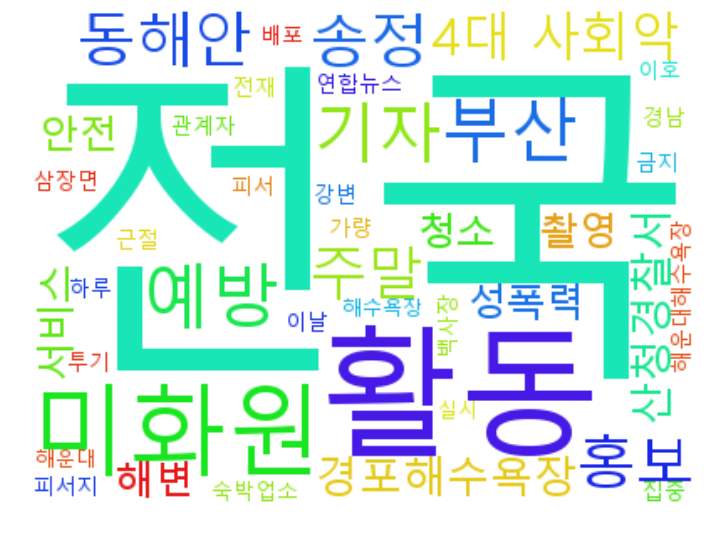

[('전국', 308),
 ('활동', 252),
 ('미화원', 140),
 ('부산', 126),
 ('예방', 126),
 ('기자', 112),
 ('동해안', 98),
 ('홍보', 98),
 ('송정', 84),
 ('주말', 84),
 ('4대 사회악', 70),
 ('경포해수욕장', 70),
 ('산청경찰서', 70),
 ('서비스', 70),
 ('성폭력', 70),
 ('안전', 70),
 ('청소', 70),
 ('촬영', 70),
 ('해변', 70),
 ('해운대해수욕장', 70),
 ('경남', 56),
 ('집중', 56),
 ('가량', 42),
 ('강변', 42),
 ('관계자', 42),
 ('근절', 42),
 ('금지', 42),
 ('배포', 42),
 ('백사장', 42),
 ('삼장면', 42),
 ('숙박업소', 42),
 ('연합뉴스', 42),
 ('이날', 42),
 ('이호', 42),
 ('전재', 42),
 ('투기', 42),
 ('피서', 42),
 ('피서지', 42),
 ('하루', 42),
 ('해수욕장', 42),
 ('해운대', 42),
 ('실시', 28)]

In [51]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()
from wordcloud import WordCloud
sorted(word_count, key=operator.itemgetter(1), reverse=True)

In [ ]:
# 2000도 피서관련기사에서는 행사와 피서지와 관련된 워드들이 나타낫고 15년 기사에서는 사회악,성폭력,쓰레기등 범죄와관련된 
# 부정적단어들이 발견되어 시대가 흐를수록 사회가 불안정하고 범죄관련 이슈들이 많이 발생함을 추측해본다